<a href="https://colab.research.google.com/github/noonanj5atwit/Spam_Email_Detector/blob/main/Email_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow==2.15.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 52.9 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.14.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.14.0
    Uninstalling tensorflow-2.14.0:
      Successfully

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import tensorflow as tf
print(tf.__version__)

2.15.0


In [2]:
data = pd.read_csv('combined_data.csv')
data.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


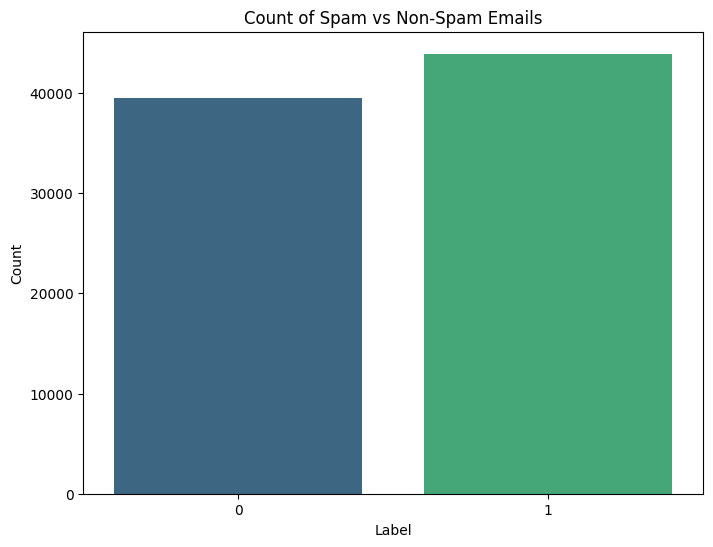

In [4]:
plt.figure(figsize=(8,6))
sns.countplot(x='label', data=data, palette='viridis')
plt.title('Count of Spam vs Non-Spam Emails')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [11]:
label_counts = data['label'].value_counts()

print(f'Total Non Spam Emails: {label_counts[0]}')
print(f'Total Spam Emails: {label_counts[1]}')

Total Non Spam Emails: 39538
Total Spam Emails: 43910


In [12]:
spam_data = data[data['label'] == 1].sample(n=1000, random_state=42)
non_spam_data = data[data['label'] == 0].sample(n=1000, random_state=42)

In [14]:
sample_data = pd.concat([spam_data, non_spam_data])

print("Sampled Spam Data:")
print(spam_data)

print("\nSampled Non-Spam Data:")
print(non_spam_data)

Sampled Spam Data:
       label                                               text
73411      1  wireless optical\n3 - button scroll mouse\nlim...
27342      1  from the desk of philip moore\ndept credit con...
27216      1  submitting your website in search engines may ...
40043      1  managers wanted inc escapenumber company is lo...
54549      1  anatrim an extremely efficient flesh loss blen...
...      ...                                                ...
56593      1  software for ninety days the customers it work...
41466      1  e earn\n$ 1500 or more per week !\nthis offer ...
58365      1  hello ,\ni sent you an email recently and i ' ...
73653      1  if you receive a vast amount of bulk email the...
14223      1  hello theorize plg uwaterloo ca needlework cur...

[1000 rows x 2 columns]

Sampled Non-Spam Data:
       label                                               text
53671      0  umaru yar'adua candidate of nigeria's ruling p...
16184      0  on tue jun escapenumbe

In [70]:
print("Sampled Spam Data:", spam_data.shape[0])
print("Sample Non Spam Data:", non_spam_data.shape[0])

Sampled Spam Data: 1000
Sample Non Spam Data: 1000


In [64]:
from sklearn.model_selection import train_test_split

X = data['text'].values
y = data['label'].values

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(
    sample_data['text'], sample_data['label'], test_size=0.2, random_state=42)

In [65]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = max(len(seq) for seq in X_train_seq)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=X_train_pad.shape[1]),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [73]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_data=(X_test_pad, y_test))

Epoch 1/10
50/50 [==============================] - 33s 639ms/step - loss: 1.1834 - accuracy: 0.5931 - val_loss: 0.5793 - val_accuracy: 0.7125
Epoch 2/10
50/50 [==============================] - 32s 634ms/step - loss: 0.3906 - accuracy: 0.8706 - val_loss: 0.2896 - val_accuracy: 0.8950
Epoch 3/10
50/50 [==============================] - 33s 657ms/step - loss: 0.1064 - accuracy: 0.9694 - val_loss: 0.1595 - val_accuracy: 0.9500
Epoch 4/10
50/50 [==============================] - 34s 687ms/step - loss: 0.0241 - accuracy: 0.9962 - val_loss: 0.1336 - val_accuracy: 0.9600
Epoch 5/10
50/50 [==============================] - 41s 827ms/step - loss: 0.0125 - accuracy: 0.9969 - val_loss: 0.1382 - val_accuracy: 0.9525
Epoch 6/10
50/50 [==============================] - 34s 683ms/step - loss: 0.0059 - accuracy: 0.9987 - val_loss: 0.1451 - val_accuracy: 0.9525
Epoch 7/10
50/50 [==============================] - 32s 650ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.1461 - val_accuracy: 0.9550

In [74]:
model.evaluate(X_test, y_test)

ValueError: ignored